In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
print('Dimensión de atributos en conjunto de entrenamiento:', x_train.shape)
print('Dimensión de arreglo de etiquetas en conjunto de entrenamiento:', y_train.shape)

Dimensión de atributos en conjunto de entrenamiento: (50000, 32, 32, 3)
Dimensión de arreglo de etiquetas en conjunto de entrenamiento: (50000, 1)


In [ ]:
# Representación numérica de cierta fotografía del conjunto de datos
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


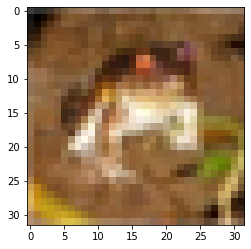

In [ ]:
# Representación visual de cierta fotografía del conjunto de datos
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [ ]:
print(y_train[0])

[6]


In [ ]:
# Visualización de etiquetas
numero_a_categoria = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'Barco', 'camion']
print('La etiqueta es:', numero_a_categoria[int(y_train[0])])

La etiqueta es: rana


In [ ]:
# one-hot encoding
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)
print('La etiqueta en one-hot encoding es:', y_train_one_hot[0])

La etiqueta en one-hot encoding es: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# Normalización
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
# Construcción de la red
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [ ]:
# Entrenamiento de la red
#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
#hist = model.fit(x_train, y_train_one_hot, batch_size=32, epochs=1000, validation_split=0.2, callbacks=[early_stop,])
hist = model.fit(x_train, y_train_one_hot, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 17s 14ms/step - loss: 0.6950 - accuracy: 0.7572 - val_loss: 0.9213 - val_accuracy: 0.6861
Epoch 2/5
1250/1250 [==============================] - 17s 14ms/step - loss: 0.6175 - accuracy: 0.7828 - val_loss: 0.8997 - val_accuracy: 0.6970
Epoch 3/5
1250/1250 [==============================] - 17s 14ms/step - loss: 0.5544 - accuracy: 0.8037 - val_loss: 0.9075 - val_accuracy: 0.6958
Epoch 4/5
1250/1250 [==============================] - 17s 14ms/step - loss: 0.5023 - accuracy: 0.8229 - val_loss: 0.9137 - val_accuracy: 0.7009
Epoch 5/5
1250/1250 [==============================] - 17s 13ms/step - loss: 0.4552 - accuracy: 0.8382 - val_loss: 0.9672 - val_accuracy: 0.7021


In [ ]:
# Guardar el modelo
model.save('mi_red_cnn.h5')

# Cargar modelo guardado
#from keras.models import load_model
#model = load_model('mi_red_cnn.h5')

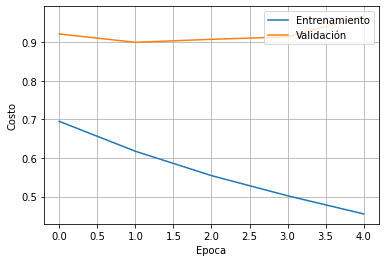

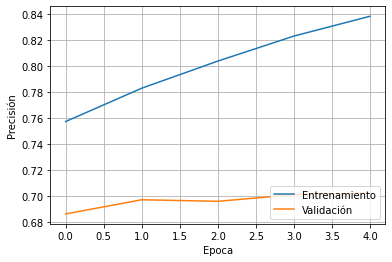

In [ ]:
# Visualización del desempeño (costo y precisión)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('Costo')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.grid(True)
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('Precisión')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.grid(True)
plt.show()

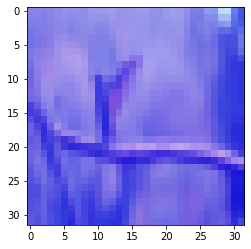

In [ ]:
# Prueba con imagen propia
imagen = plt.imread("mi_foto2.PNG")
np.random().seed(123)
from skimage.transform import resize
imagen_escalada = resize(imagen, (32,32,3))
img = plt.imshow(imagen_escalada)

In [ ]:
# Predicción con imagen propia
import numpy as np
probs = model.predict(np.array( [imagen_escalada,] ))
indices = np.argsort(probs[0,:])
print("Mayor probabilidad:", numero_a_categoria[indices[9]], "-- Probabilidad:", probs[0,indices[9]])
print("Segundo más probable:", numero_a_categoria[indices[8]], "-- Probabilidad:", probs[0,indices[8]])
print("Tercer más probable:", numero_a_categoria[indices[7]], "-- Probabilidad:", probs[0,indices[7]])

Mayor probabilidad: avion -- Probabilidad: 0.8239415
Segundo más probable: Barco -- Probabilidad: 0.15785557
Tercer más probable: pajaro -- Probabilidad: 0.018094925
